<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>
<H3 align='center'> Ignacio Pinedo </H3>

## 3. Análisis de emociones en tweets



   > a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el dataset.


In [1]:
import pandas as pd
df = pd.read_csv('emotionanalysis/text_emotion.csv')
print(df.shape)
print(df['sentiment'].value_counts())
df.head()

(40000, 4)
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


Hay 40000 tweets y  13 clases.

>b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos. Genere un conjunto de validación si estima conveniente.

In [2]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

>c) Construya las representaciones de los datos con los que trabajará, ya sea para las entradas de los modelos como para las salidas. Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros. 

In [4]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

import re
# limpieza de los datos

corpus_train = '\n'.join(df_train['content'])
corpus_train = re.sub(r'@[A-Za-z0-9]+','',corpus_train) #elimina hashtags
corpus_train = re.sub('[#$.,!?%&:0-9]', '', corpus_train) #elimina signos de puntacion
corpus_train = re.sub(' +',' ',corpus_train) #elimina doble espacios

corpus_test= '\n'.join(df_test['content'])
corpus_test = re.sub(r'@[A-Za-z0-9]+','',corpus_test) #elimina hashtags
corpus_test = re.sub('[#$.,!?%&:0-9]', '', corpus_test) #elimina signos de puntacion
corpus_test = re.sub(' +',' ',corpus_test) #elimina doble espacios

sentences_train = corpus_train.split('\n')
sentences_test = corpus_test.split('\n')
    
# representacion

vect_word = TfidfVectorizer(max_features=200)
X_train = vect_word.fit_transform(sentences_train)
y_train = df_train["sentiment"]

X_test = vect_word.fit_transform(sentences_test)
y_test = df_test["sentiment"]


Primero se limpian los datos, eliminando los hashtags, signos de puntuacion y dobles espacios. Luego, se utliza la tecnica  term frequency–inverse document frequency o tf-idf, que es una mejora del vector counting que toma en cuenta la frecuencia de las palabras el total del texto.

>d) Entrene y compare al menos 4 de los diferentes clasificadores vistos en clases para clasificación (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logı́stica y Perceptrón). Recuerde que algunos son extendidos por defecto a múltiples clases para detectar emociones en cada tweet, sin embargo, otros deben ser extentidos a través de otras técnicas, tal como One vs One y One vs All/Rest. Muestre tabla o gráfico resumen.

In [61]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt


alphas = np.logspace(0,3,base=10)

<function matplotlib.pyplot.show(*args, **kw)>

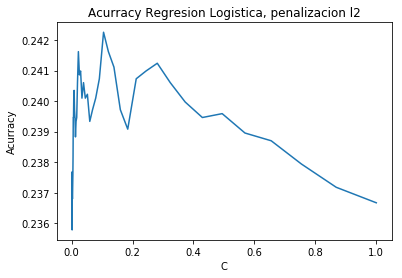

In [62]:
hist=[]
for alpha in alphas:
    linreg = LogisticRegression(penalty="l2",C=1/alpha)
    linreg.fit(X_train,y_train)
    hist.append(linreg.score(X_test,y_test))

plt.title("Acurracy Regresion Logistica, penalizacion l2")
plt.xlabel("C")
plt.ylabel("Acurracy")
plt.plot(1/alphas,hist, label='Regresion Logistica')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

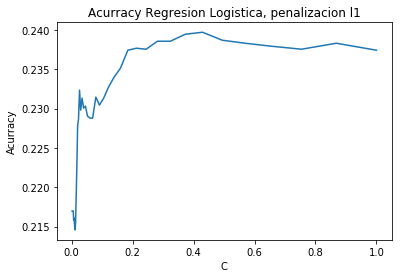

In [63]:
hist=[]
for alpha in alphas:
    linreg = LogisticRegression(penalty="l1",C=1/alpha)
    linreg.fit(X_train,y_train)
    hist.append(linreg.score(X_test,y_test))

plt.title("Acurracy Regresion Logistica, penalizacion l1")
plt.xlabel("C")
plt.ylabel("Acurracy")
plt.plot(1/alphas,hist, label='Regresion Logistica')
plt.show
    

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

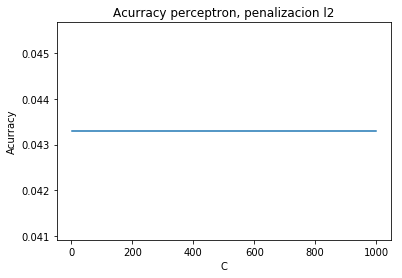

In [64]:
hist=[]
for alpha in alphas:
    perc= Perceptron(penalty="l2",alpha=alpha)
    perc.fit(X_train,y_train)
    hist.append(perc.score(X_test,y_test))
plt.title("Acurracy perceptron, penalizacion l2")
plt.xlabel("C")
plt.ylabel("Acurracy")
plt.plot(alphas,hist)
plt.show
    

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

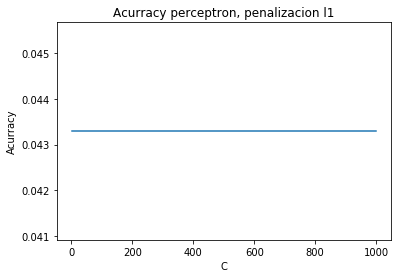

In [65]:
hist=[]
for alpha in alphas:
    perc= Perceptron(penalty="l1",alpha=alpha)
    perc.fit(X_train,y_train)
    hist.append(perc.score(X_test,y_test))

plt.title("Acurracy perceptron, penalizacion l1")
plt.xlabel("C")
plt.ylabel("Acurracy")
plt.plot(alphas,hist)
plt.show
    

In [66]:

perc= Perceptron(alpha=alpha)
perc.fit(X_train,y_train)
print("Acurracy perceptron sin penalizacion:",perc.score(X_test,y_test))


Acurracy perceptron sin penalizacion: 0.1717877094972067


C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


<function matplotlib.pyplot.show(*args, **kw)>

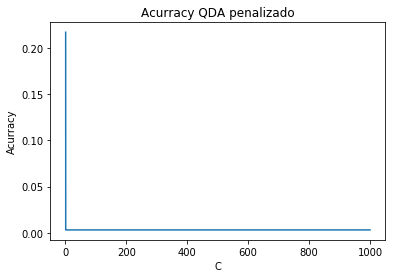

In [69]:
hist=[]
for alpha in alphas:
    qda = QDA( reg_param=alpha)
    qda.fit(X_train.toarray(),y_train)
    hist.append(qda.score(X_test.toarray(),y_test))
plt.title("Acurracy QDA penalizado")
plt.xlabel("C")
plt.ylabel("Acurracy")
plt.plot(alphas,hist)
plt.show

In [68]:


NB = MultinomialNB()
NB.fit(X_train,y_train)
NB.score(X_test,y_test)

0.22739969527679024

Una tabla resumen con los mejores resultados para cada clasificador:

| Clasificador| Regresion Logistica   | Perceptron| QDA| Naive Bayes Multinomial
|------|------|------|------|------|
|Accuracy  | 0.242|0.171|0.22|0.227|

Se aprecia que la regresion logistica y NVmultinomial obtienen los mejores resultados, sin embargo, ya que hay 13 clases significa que eligiendo aleatoriamiente la probabilidad de elegir la clase correcta es de $\frac{1}{13}=0.076$, por lo tanto todos los clasificadores son mejores que la eleccion aleatoria. Por otro lado, los distintos clasificadores estan implementados por defecto con la tecnica one vs rest, por lo tanto todos son clasificadores multinomiales.

>e) Utilice la técnica de ECOC (Error-Correcting Output-Code) para extender a multiclases algunos de los clasificadores utilizados en d). Comente lo que hace la técnica y los resultados observados.

Los clasificadores ya son multiclases.

>f) Evalúe la métrica de accuracy sobre el conjunto de pruebas del mejor clasificador encontrado.
Recuerde que puede acudir a otras métricas para tener otras visiones de lo que está haciendo el modelo de aprendizaje

Eso se hizo

>g) Intente mejorar su resultado considerablemente a través de alguna mejora novedosa. Se espera que supere el 35% de accuracy.